In [1]:
import random
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    prob: float

graph_builder = StateGraph(State)

In [2]:
def init_probability(state: State):
    return {"probability": state.get("prob")}

graph_builder.add_node('init_probility', init_probability)

In [3]:
def add_probability(state: State):
    prev_probability = state.get("prob")
    random_value = random.random()
    
    print("######## ADD PROBABILITY ########")
    print(f"RANDOM VALUE: {random_value}")
    
    state.update(
        {"prob": prev_probability + random_value}
        )
    return {"prob": state.get("prob")}

graph_builder.add_node("add_probability", add_probability)

In [4]:
def check_probability(state: State):
    print("######## CHECKING PROBABILITY ########")
    print(f"CURRENT PROBABILITY: {state['prob']}")
    return {"prob": state.get("prob")}
    
graph_builder.add_node("check_probability", check_probability)

In [5]:
def route_to_add(state: State):
    print("######## ROUTE TO ADD ########")
    current_probability = state.get("prob")
    
    if current_probability >= 1:
        print("=> PROBABILITY IS GREATER THAN 1")
        return "pass"
    else:
        print("=> PROBABILITY IS LESS THAN 1")
        return "fail"

graph_builder.add_conditional_edges(
    "check_probability",
    route_to_add,
    {"fail": "add_probability", "pass": "final_probabilty"}
)

In [6]:
def final_probabilty(state: State):
    print("######## FINAL PROBABILITY ########")
    print(f"FINAL PROBABILITY: {state['prob']}")
    return {"probability": state.get("prob")}

graph_builder.add_node("final_probabilty", final_probabilty)

In [7]:
graph_builder.add_edge(START, "init_probility")
graph_builder.add_edge("init_probility", "check_probability")
graph_builder.add_edge("add_probability", "check_probability")
graph_builder.add_edge("final_probabilty", END)
graph = graph_builder.compile()

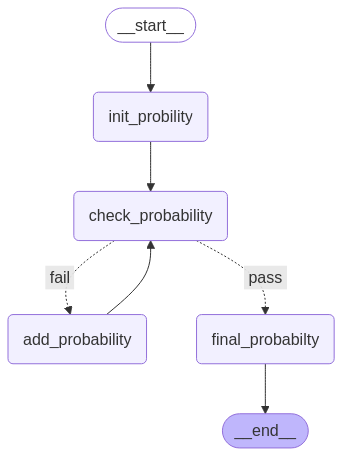

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
graph.invoke({"prob":-0.5})

######## CHECKING PROBABILITY ########
CURRENT PROBABILITY: -0.5
######## ROUTE TO ADD ########
=> PROBABILITY IS LESS THAN 1
######## ADD PROBABILITY ########
RANDOM VALUE: 0.6746401239508617
######## CHECKING PROBABILITY ########
CURRENT PROBABILITY: 0.1746401239508617
######## ROUTE TO ADD ########
=> PROBABILITY IS LESS THAN 1
######## ADD PROBABILITY ########
RANDOM VALUE: 0.31736326981703245
######## CHECKING PROBABILITY ########
CURRENT PROBABILITY: 0.49200339376789415
######## ROUTE TO ADD ########
=> PROBABILITY IS LESS THAN 1
######## ADD PROBABILITY ########
RANDOM VALUE: 0.39121100403701126
######## CHECKING PROBABILITY ########
CURRENT PROBABILITY: 0.8832143978049054
######## ROUTE TO ADD ########
=> PROBABILITY IS LESS THAN 1
######## ADD PROBABILITY ########
RANDOM VALUE: 0.6166485495434987
######## CHECKING PROBABILITY ########
CURRENT PROBABILITY: 1.499862947348404
######## ROUTE TO ADD ########
=> PROBABILITY IS GREATER THAN 1
######## FINAL PROBABILITY ########
FINAL

{'prob': 1.499862947348404}